In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import numpy as np


In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print("Dataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Summary Statistics:

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10

In [4]:
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['pass'] = (df['math score'] > 40).astype(int)

In [5]:
df = df.dropna(subset=['reading score', 'writing score', 'gender'], how='all')
df[['reading score', 'writing score', 'gender']] = SimpleImputer(strategy='mean').fit_transform(
    df[['reading score', 'writing score', 'gender']])


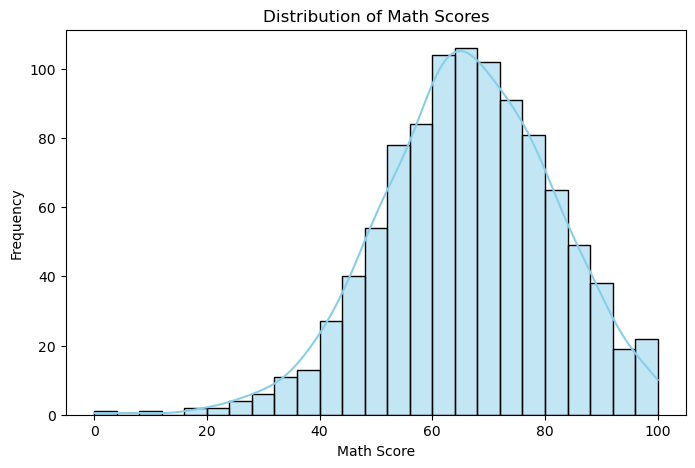

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

# Assistant
This error occurs because your training data (`X_train`) contains NaN (Not a Number) values, and the LogisticRegression model in scikit-learn doesn't handle missing values automatically.

Would you like me to provide the corrected code?

# User
yes please provide the correct code

In [8]:
X = df[['reading score', 'writing score', 'gender']]
y = df['pass']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [14]:
y_pred = model.predict(X_test_imputed)

C:\Users\spgav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.98

Confusion Matrix:
 [[  9   4]
 [  0 187]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.98      1.00      0.99       187

    accuracy                           0.98       200
   macro avg       0.99      0.85      0.90       200
weighted avg       0.98      0.98      0.98       200



In [17]:
new_student = pd.DataFrame([[72, 74, 1]], columns=['reading score', 'writing score', 'gender'])
new_student_imputed = imputer.transform(new_student)
prediction = model.predict(new_student_imputed)
print("Pass Prediction (1 = Pass, 0 = Fail):", prediction[0])

Pass Prediction (1 = Pass, 0 = Fail): 1


C:\Users\spgav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import os
os.getcwd()



'C:\\Users\\spgav\\Desktop\\student performance prediction project'